## These scores are all metrics that can be used to evaluate the quality of clustering results. 

They can be used to compare different clustering algorithms or to evaluate the results of a clustering algorithm on a particular dataset.

- **Homogeneity score:** This score measures how well the data points within a cluster are all similar to each other. A high homogeneity score indicates that the data points within a cluster are very similar, while a low homogeneity score indicates that the data points within a cluster are not very similar.

- **Completeness score:** This score measures how well all of the data points that belong to a particular class are assigned to the same cluster. A high completeness score indicates that all of the data points that belong to a particular class are assigned to the same cluster, while a low completeness score indicates that some of the data points that belong to a particular class are assigned to other clusters.
- **V-measure score:** This score is a combination of the homogeneity score and the completeness score. A high V-measure score indicates that both the homogeneity score and the completeness score are high, which means that the data points within a cluster are very similar to each other and all of the data points that belong to a particular class are assigned to the same cluster.
- **Adjusted Rand index (ARI):** This score measures the similarity between the clustering results and the ground truth labels. A high ARI score indicates that the clustering results are similar to the ground truth labels, while a low ARI score indicates that the clustering results are not similar to the ground truth labels.
- **Adjusted mutual information (AMI):** This score is similar to the ARI score, but it takes into account the number of clusters in the clustering results. A high AMI score indicates that the clustering results are similar to the ground truth labels, while a low AMI score indicates that the clustering results are not similar to the ground truth labels.
- **Silhouette score**: It is a measure of how well each data point is assigned to its cluster. A high silhouette score indicates that a data point is well-assigned to its cluster, while a low silhouette score indicates that a data point is not well-assigned to its cluster.

    The silhouette score can be interpreted as follows:

    * A score close to 1 indicates that the data point is well-assigned to its cluster.
    * A score close to -1 indicates that the data point is not well-assigned to its cluster.
    * A score close to 0 indicates that the data point is on the boundary between two clusters.


In [4]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## data, thanks sklearn
import sklearn.datasets as skd

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

from time import time

from sklearn import metrics
from sklearn.pipeline import make_pipeline


In [5]:
digits = skd.load_digits()

In [6]:
## images contains the arrays for the images
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

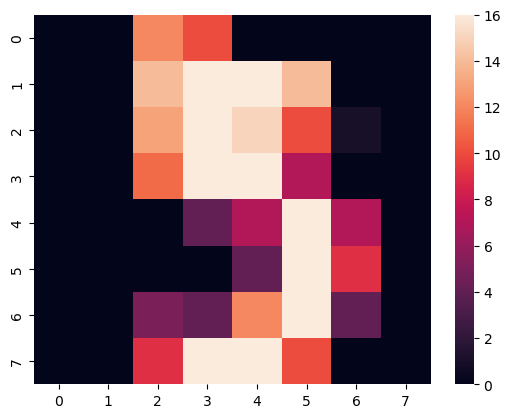

In [7]:
## number 5
sns.heatmap(digits['images'][5]);


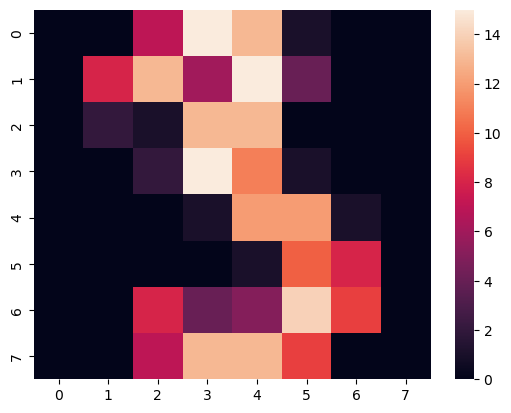

In [8]:
## number 3, I think
sns.heatmap(digits['images'][3]);

In [9]:
## This has been flatten already.
digits['data'][0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [219]:
digits['images'][0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [166]:
digits['images'][0].shape

(8, 8)

In [167]:
digits['target'][5]

5

In [10]:
df = pd.DataFrame(digits.data)

In [169]:
df.shape

(1797, 64)

In [170]:
## we have 8 x 8 flatten pictures of nums
## each row is an example. we do not have
## the labels tho.

In [171]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [11]:
df['target'] = digits.target
df.head(15)

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
5,0.0,0.0,12.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,9.0,16.0,16.0,10.0,0.0,0.0,5
6,0.0,0.0,0.0,12.0,13.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,9.0,15.0,11.0,3.0,0.0,6
7,0.0,0.0,7.0,8.0,13.0,16.0,15.0,1.0,0.0,0.0,...,0.0,0.0,0.0,13.0,5.0,0.0,0.0,0.0,0.0,7
8,0.0,0.0,9.0,14.0,8.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,11.0,16.0,15.0,11.0,1.0,0.0,8
9,0.0,0.0,11.0,12.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,9.0,12.0,13.0,3.0,0.0,0.0,9


In [12]:
X = df.drop('target', axis='columns')
y = df['target']

In [13]:
## Standarizing the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [175]:
df['target'].unique()

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

## Inertia
In k-means clustering, inertia is a measure of how well the data points are clustered together. It is calculated as the sum of the squared distances between each data point and its assigned cluster centroid. A lower inertia value indicates that the data points are more tightly clustered together, while a higher inertia value indicates that the data points are more spread out.

Inertia is the sum of the squared distances between each observation and its closest centroid. It's a measurement of intra-cluster distance. So it gauges how closely related each observation is to the other observations in its own cluster.

The formula for inertia is as follows:

inertia = $Σ(d(x, μ)^2)$

where:

$x$ is a data point

$μ$ is the centroid of the cluster that $x$ belongs to

$d(x, μ)$ is the distance between $x$ and $μ$

The inertia value can be used to select the optimal number of clusters for k-means clustering. A good rule of thumb is to choose the number of clusters that minimizes the inertia value. However, it is important to note that the inertia value is not a perfect measure of cluster quality, and other factors, such as the distribution of the data points, can also affect the results of k-means clustering.

Also the same expresed different:

## Inertia

$$Σ_{i=1}^{n} (x_i - c_k)^2$$

where $n$ is the total number of observations in the data and $c_k$ is the `centroid` of the cluster that the observation $x_i$ is in. 


Therefore, it's important for inertia to be as close to zero as possible. Can inertia ever be zero? Well, it's possible, but this scenario wouldn't offer any new insight into the data. 

Here's why. In one case, if all observations were identical, this would mean all data points are in the same location, then inertia equals zero for all values of k. The second case is when the number of clusters is equal to the number of observations. If each observation is in its own cluster, then its centroid is itself. 

Inertia is a great metric because it helps us to decide on the optimal $k$ value. We do this by using the **elbow method**. In the elbow method, we first build models with different values of k. Then we plot the inertia for each k value.

Here's an example. Notice that the greater the value is for k, the lower the inertia. Should you always select high k values? Well, no. A low inertia is great, but if it results in meaningless or inexplicable clusters, it doesn't help you at all. 

A good way of choosing an optimal k value is to find **the elbow of the curve. This is the value of k at which the decrease in inertia starts to level off**. 
Is up to you to determine which is best for your particular project. 

The second important metric for evaluating your k-means model is the **silhouette score.**

This is a more precise evaluation metric than inertia because it takes into account the separation between the clusters. 

**Silhouette score** is defined as the mean of the silhouette coefficients of all the observations in the model. 

Silhouette score is a more precise evaluation metric than inertia because it takes into account the separation between the clusters. 

Silhouette score is defined as the mean of the silhouette coefficients of all the observations in the model. 

Each observation has its own silhouette coefficient which is calculated as b minus a over whichever value is greater, a or b, where a is the mean distance from that observation to all other observations in the same cluster and b is the mean distance from that observation to each observation in the next closest cluster. 

Each observation has its own silhouette coefficient which is calculated as b minus a over whichever value is greater, a or b, where a is the mean distance from that observation to all other observations in the same cluster and b is the mean distance from that observation to each observation in the next closest cluster. 

$$ S = (b-a) \div argmax(a, b)$$

The silhouette coefficient can be anywhere between negative 1 and 1. Consider this schematic. If an observation has a silhouette coefficient close to one, it means that it's both nicely within its own cluster and well separated from other clusters. A value of zero indicates that the observation is on the boundary between clusters. If your observation has a silhouette coefficient close to negative 1, it may be in the wrong cluster. As you've just experienced, when using silhouette score to help determine how many clusters your model should have, you'll generally want to opt for the k value that maximizes your silhouette score. Inertia and silhouette score are important metrics to help you determine the most appropriate number of clusters for your k-means model. Now that you're familiar with how they're derived, you'll be well-prepared to continue working with them.

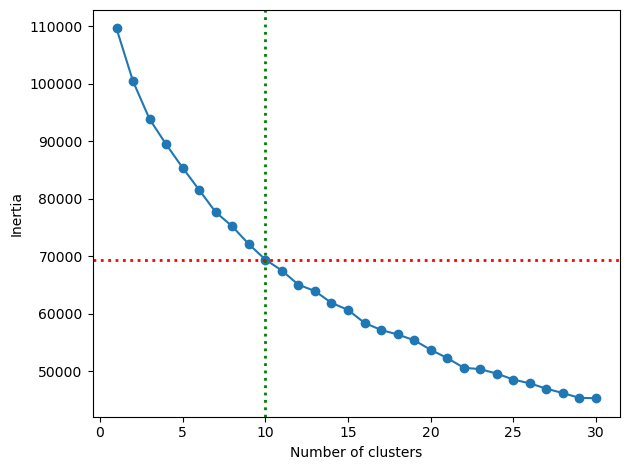

In [14]:
## We know tha labels are 10
## from 0 to 9.

n_digits = 10

inertiaValue = []
for i in range(1, 31):
    km = KMeans(n_clusters=i, 
                init='k-means++',
                n_init=4, 
                max_iter=300,
                tol=1e-04,
                random_state=42)
    
    km.fit(X_std)
    inertiaValue.append(km.inertia_)
    
plt.plot(range(1, 31), inertiaValue, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.axvline(x=10, color='green', ls=':', lw=2, label='labels')
## y=69432.684 is the inertia for k=10.
plt.axhline(y=69432.68427431678, color='red', ls=':', lw=2, label='labels')
#69432.68427431678
plt.tight_layout()
#plt.savefig('elbow.png', dpi=300)
plt.show()

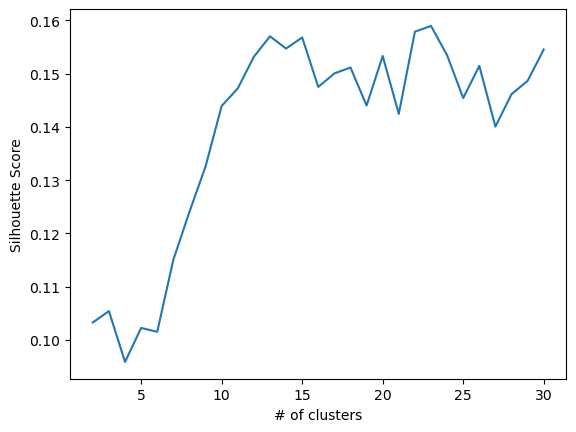

In [20]:
from sklearn.metrics import silhouette_score
def kmeans_sil(num_clusters, x_vals):
    '''
    Fits a KMeans model for different values of k.
    Calculates a silhouette score for each k value

    Args:
        num_clusters: (list of ints)  - The different k values to try
        x_vals:       (array)         - The training data

    Returns: 
        sil_score:    (list)          - A list of silhouette scores, one for each \
                                      value of k
    '''
  
    sil_score = []
    for num in num_clusters:
        kms = KMeans(n_clusters=num, random_state=42)
        kms.fit(x_vals)
        sil_score.append(silhouette_score(x_vals, kms.labels_))
    
    return sil_score
num_clusters = [i for i in range(2, 31)]
sil_score = kmeans_sil(num_clusters, X_std)

plot = sns.lineplot(x=num_clusters, y=sil_score)
plot.set_xlabel("# of clusters");
plot.set_ylabel("Silhouette Score");



In [177]:
## we know the labels tho.

km = KMeans(n_clusters=n_digits, 
            init='k-means++', 
            n_init=4, 
            max_iter=300,
            tol=1e-04,
            random_state=42)

In [178]:
## Testing the algorithm in the data set

predicted = km.fit_predict(X_std)
print(f'Inertia: {km.inertia_}')

Inertia: 69432.68427431678


In [179]:
df['clustered'] = predicted

In [180]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,56,57,58,59,60,61,62,63,target,clustered
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1,3
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2,3
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3,7
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4,4


In [218]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1797 entries, 0 to 1796
Data columns (total 66 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   0          1797 non-null   float64
 1   1          1797 non-null   float64
 2   2          1797 non-null   float64
 3   3          1797 non-null   float64
 4   4          1797 non-null   float64
 5   5          1797 non-null   float64
 6   6          1797 non-null   float64
 7   7          1797 non-null   float64
 8   8          1797 non-null   float64
 9   9          1797 non-null   float64
 10  10         1797 non-null   float64
 11  11         1797 non-null   float64
 12  12         1797 non-null   float64
 13  13         1797 non-null   float64
 14  14         1797 non-null   float64
 15  15         1797 non-null   float64
 16  16         1797 non-null   float64
 17  17         1797 non-null   float64
 18  18         1797 non-null   float64
 19  19         1797 non-null   float64
 20  20      

In [181]:
pos = 0
neg = 0
for i in range(df.shape[0]):
    if df['target'][i] == df['clustered'][i]:
        pos += 1
    else: neg += 1
    

In [182]:
## accuracy ??
pos / (pos + neg)

0.20756816917084028

In [207]:
## correctly grouped examples.
pos, pos + neg

(373, 1797)

In [184]:


def bench_k_means(kmeans, name, data, labels):
    """Benchmark to evaluate the KMeans initialization methods.

    Parameters
    ----------
    kmeans : KMeans instance
        A :class:`~sklearn.cluster.KMeans` instance with the initialization
        already set.
    name : str
        Name given to the strategy. It will be used to show the results in a
        table.
    data : ndarray of shape (n_samples, n_features)
        The data to cluster.
    labels : ndarray of shape (n_samples,)
        The labels used to compute the clustering metrics which requires some
        supervision.
    """
    t0 = time()
    estimator = make_pipeline(StandardScaler(), kmeans).fit(data)
    fit_time = time() - t0
    results = [name, fit_time, estimator[-1].inertia_]

    # Define the metrics which require only the true labels and estimator
    # labels
    clustering_metrics = [
        metrics.homogeneity_score,
        metrics.completeness_score,
        metrics.v_measure_score,
        metrics.adjusted_rand_score,
        metrics.adjusted_mutual_info_score,
    ]
    results += [m(labels, estimator[-1].labels_) for m in clustering_metrics]

    # The silhouette score requires the full dataset
    results += [
        metrics.silhouette_score(
            data,
            estimator[-1].labels_,
            metric="euclidean",
            sample_size=300,
        )
    ]

    # Show the results
    formatter_result = (
        "{:9s}\t{:.3f}s\t{:.0f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}"
    )
    print(formatter_result.format(*results))

In [191]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

data = X_std
labels = y

print(82 * "_")
print("init\t\ttime\tinertia\thomo\tcompl\tv-meas\tARI\tAMI\tsilhouette")

kmeans = KMeans(init="k-means++", n_clusters=n_digits, n_init=4, random_state=42)
bench_k_means(kmeans=kmeans, name="k-means++", data=data, labels=labels)

kmeans = KMeans(init="random", n_clusters=n_digits, n_init=4, random_state=42)
bench_k_means(kmeans=kmeans, name="random", data=data, labels=labels)

pca = PCA(n_components=n_digits).fit(data)
kmeans = KMeans(init=pca.components_, n_clusters=n_digits, n_init=4)
bench_k_means(kmeans=kmeans, name="PCA-based", data=data, labels=labels)

print(82 * "_")

__________________________________________________________________________________
init		time	inertia	homo	compl	v-meas	ARI	AMI	silhouette
k-means++	0.088s	69433	0.602	0.650	0.625	0.465	0.621	0.119
random   	0.049s	69769	0.665	0.712	0.688	0.549	0.685	0.134
PCA-based	0.020s	70805	0.672	0.698	0.685	0.562	0.682	0.088
__________________________________________________________________________________


/home/gato/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1146: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=4.
  self._check_params(X)


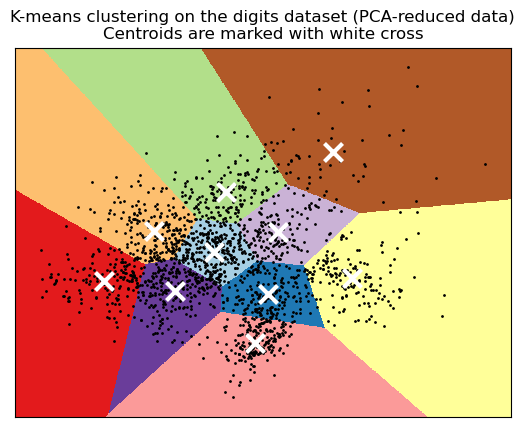

In [192]:
## plotting the groups in 2d

reduced_data = PCA(n_components=2).fit_transform(data)
kmeans = KMeans(init="k-means++", n_clusters=n_digits, n_init=4)
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = 0.02  # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(
    Z,
    interpolation="nearest",
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    cmap=plt.cm.Paired,
    aspect="auto",
    origin="lower",
)

plt.plot(reduced_data[:, 0], reduced_data[:, 1], "k.", markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="x",
    s=169,
    linewidths=3,
    color="w",
    zorder=10,
)
plt.title(
    "K-means clustering on the digits dataset (PCA-reduced data)\n"
    "Centroids are marked with white cross"
)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

## When you have existing labels: Contingency tables, RI, and ARI

If you have a ground truth—some existing data-point group memberships that you can use to check your clusters against—then you can choose the cluster solution that most closely replicates the group memberships that you already know. [There are a lot of methods for this](http://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation). You will review two here: the basic *contingency table* and the somewhat more complex *Adjusted Rand Index* (ARI).

### Contingency tables

A contingency table is a tabulation of the number of observations in each class against the clusters that are assigned to them. You can make use of the pandas' `crosstab()` function to derive a contingency table. Here is an example of a contingency table comparing the cluster memberships for the ground truth and the new cluster solution for your k-means analysis of the *Iris* data:

In [201]:
# Get predicted clusters
full_pred = KMeans(init="k-means++", n_clusters=10, random_state=42).fit_predict(X_std)

pd.crosstab(y, full_pred) 

col_0,0,1,2,3,4,5,6,7,8,9
target,,,,,,,,,,
0,177,0,0,0,1,0,0,0,0,0
1,0,0,0,96,1,0,27,0,0,58
2,0,0,2,34,0,0,48,6,82,5
3,0,0,8,9,0,0,1,152,13,0
4,0,0,4,3,157,9,0,0,0,8
5,0,2,2,59,2,0,0,72,43,2
6,1,175,0,4,0,0,0,0,0,1
7,0,0,150,0,0,18,0,0,8,3
8,0,3,2,99,0,0,0,46,9,15


In [220]:
df['clustered'].value_counts()

7    421
3    309
1    180
0    178
2    176
4    161
8    155
9    111
6     76
5     30
Name: clustered, dtype: int64

In [221]:
df['target'].value_counts()

3    183
1    182
5    182
4    181
6    181
9    180
7    179
0    178
2    177
8    174
Name: target, dtype: int64

convert it to a ratio of "correctly assigned" data points to total data points, in order to get a one-number solution that you could use to compare across algorithms. However, this basic contingency table solution fails to capture one of the most important things about clustering—that it not only tells you about cluster memberships of individual data points, but also about the relationships between data-point pairs. To do that, you can use the *Rand Index*, which you'll learn about next.


### The Rand Index

The *Rand Index* (RI) compares how pairs of data points relate in the ground truth and in the new solution. There are four possible types of pair relationships:

 1. Members of the same cluster in the ground truth, and members of the same cluster in the new solution  
 2. Members of the same cluster in the ground truth, and members of different clusters in the new solution  
 3. Members of different clusters in the ground truth, and members of the same cluster in the new solution  
 4. Members of different clusters in the ground truth, and members of different clusters in the new solution  

The Rand Index is the ratio of the number of pairs where the ground truth and the new solution agree, over the total number of pairs:

$$RI=\dfrac{a+d}{a+b+c+d}$$

Scores range from `0` to `1`, where `1` indicates perfect agreement between the ground truth and the new solution.

Below, calculate the RI by hand:

In [222]:
import scipy
def rand_index_score(ground_truths, predictions):
    tp_plus_fp = scipy.special.comb(np.bincount(predictions), 2).sum()
    tp_plus_fn = scipy.special.comb(np.bincount(ground_truths), 2).sum()
    A = np.c_[(ground_truths, predictions)]
    tp = sum(scipy.special.comb(np.bincount(A[A[:, 0] == i, 1]), 2).sum()
             for i in set(ground_truths))
    fp = tp_plus_fp - tp
    fn = tp_plus_fn - tp
    tn = scipy.special.comb(len(A), 2) - tp - fp - fn
    return (tp + tn) / (tp + fp + fn + tn)
rand_index_score(y, full_pred)

0.889112390980761

The RI score is quite close to `1`, which is a good sign for the performance of your k-means solution. 

Although RI is nice because it can also be interpreted as the probability that the ground truth and the new solution will agree for any pair, it fails to account for the effect of chance. If you just assigned data points to clusters at random (the same number and size of clusters), you'd get an RI considerably higher than `0`. The RI produced by random cluster assignment is called the *Expected RI* (or in short, $\mathbb{E}(RI)$).

### Adjusted Rand Index

The *Adjusted Rand Index* (ARI) applies $\mathbb{E}(RI)$ as a correction factor. With ARI, it is possible to get values less than `0`, but `1` still indicates perfect agreement, and `0` indicates perfect randomness.

In a two-cluster solution with an equal number of data points in each cluster, just assigning each data point to cluster 0 or cluster 1 at random would yield an RI of `0.5`. To correct for the influence of chance and to yield a metric where `0` indicates random labeling and `1` indicates perfect replication of the ground truth, the Adjusted Rand Index applies a correction factor based on the expected RI from randomness:

$$ARI=\dfrac{RI-\mathbb{E}(RI)}{max(RI)-\mathbb{E}(RI)}$$

In [223]:
metrics.adjusted_rand_score(y, full_pred)

0.4654932987132127

This indicates that the k-means clustering solution is closer to random than to perfect. 

**Note:** ARI can be used effectively on all clustering algorithm types, so it is great for comparing different algorithm solutions to one another.

#### When you *don't* have existing labels: 

# Similarity

What if you don't have a ground truth? Then you need to use other criteria to evaluate clusters, such as similarity. A good cluster is made up of data points that are more similar to one another than they are to data points in other clusters. One way of computing similarity is the *silhouette coefficient*.

For each data point, the silhouette coefficient is the difference between the mean distance between that data point and all other points in its cluster ($a_i$) and the mean distance between that data point and all other points in the nearest other cluster ($b_i$), divided by whichever of the two values is highest. This is the formula:  

$$\dfrac{b_i-a_i}{max(b_i,a_i)}$$

The mean of the silhouette coefficients for all data points is the silhouette coefficient for that clustering solution on that data. Values range from `-1` for very bad clusters to `+1` for very dense clusters. However, if clusters employ non-flat geometry, this index will not work well.

The silhouette coefficient is useful for situations where you want to compare the solutions of different clustering algorithms and you don't have a ground truth. Silhouette coefficients can be compared across algorithms, creating a one-number index to represent a clustering solution and compare it against others.

Now, try the index on the *Iris* data, using the three-cluster solution:

In [224]:
labels = KMeans(init="k-means++", n_clusters=10, random_state=42).fit_predict(X_std)
print(metrics.silhouette_score(X_std, labels, metric='euclidean'))

0.1439395996162521


In [225]:
# Defining the mini-batch k-means
minikmeans_cluster = KMeans(init="k-means++", n_clusters=10, random_state=42)

# Fit model
%timeit minikmeans_cluster.fit(X_std)
minikmeans_cluster = minikmeans_cluster.predict(X_std)

plt.figure(figsize=(10,5))
colours = 'rbgcmykwcm'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(minikmeans_cluster[i]),
             color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

100 ms ± 9.58 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
